# Описание проекта

У нас в распоряжении есть лог сервера с данными о посещениях развлекательного приложения Procrastinate Pro+ новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. 

**Цель исследования** - изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.


**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region - страна пользователя

Таблица orders_log_short (информация о заказах):

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

## Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и расходах в переменные и изучим общую информацию.


In [1]:
import pandas as pd #импортируем необходимые в рамках анализа библиотеки
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('') #откроем файлы с данными
orders = pd.read_csv('')
costs = pd.read_csv('')

Поскольку в рамках анализа необходимо ознакомиться с несколькими датасетами, создадим функцию для вывода общей информации: это позволит избавиться от повторов и сократить код.

In [3]:
def background(data):
    display(data.columns, data.head(), data.describe())
    print('*' * 50)
    data.info()

In [4]:
background(visits) #лог сервера с информацией о посещениях сайта

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
background(orders) #информация о заказах

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
background(costs) #информация о затратах на маркетинг

Index(['dt', 'Channel', 'costs'], dtype='object')

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таким образом, при рассмотрении общей информации о логах сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузке их покупок за этот период, а также статистики рекламных расходов можно заметить ряд проблем:

1) несоответствие типов данных в ряде заявленных переменных (например, поля с датой/временем);

2) названия столбцов, а также значения полей оформлены со стилистическими ошибками (регистры, пробелы).

Избавимся от выявленных проблем и приведем данные к нужному формату.

In [7]:
for data in [visits, orders, costs]: #приводим названия столбцов к одному регистру
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
for column in ['region', 'device', 'channel']: #приводим значения столбцов к одному регистру
    visits[column] = visits[column].str.lower()
costs['channel'] = costs['channel'].str.lower()

visits.head() #проверим результат обработкна примере датасета

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start']) #изменим тип данных для даты
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
print(visits['session_start'].dtypes, visits['session_end'].dtypes, orders['event_dt'].dtypes, costs['dt'].dtypes, sep='\n')
#проверим результат

datetime64[ns]
datetime64[ns]
datetime64[ns]
object


In [9]:
for column in ['region', 'device', 'channel']:  #проверим, нет ли необычных значений
    print(visits[column].unique())
costs['channel'].unique()

['united states' 'uk' 'france' 'germany']
['iphone' 'mac' 'android' 'pc']
['organic' 'tiptop' 'rocketsuperads' 'yrabbit' 'faceboom' 'mediatornado'
 'adnonsense' 'leapbob' 'wahoonetbanner' 'opplecreativemedia'
 'lambdamediaads']


array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

In [10]:
visits.duplicated().sum() #проверка на наличие дубликатов

0

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.duplicated().sum()

0

Таким образом, мы получили очищенный датасет, с которым можно работать.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

Для целей проведения исследовательского анализа зададим функции для расчета и анализа LTV, ROI, удержания и конверсии, а также функции для визуализации этих метрик.

### Функция для создания пользовательских профилей:

In [13]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания:

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии:

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI:

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма в целях визуализации метрик:

In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации LTV и ROI:

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии:

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации удержания:

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу. 

Определим минимальную и максимальную дату привлечения пользователей.

In [44]:
profiles = get_profiles(visits, orders, events = None, ad_costs = costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [22]:
min_dt = profiles['dt'].min() 
max_dt = profiles['dt'].max() 
print(f'Минимальная дата привлечения пользователей: {min_dt}, максимальная дата - {max_dt}')

Минимальная дата привлечения пользователей: 2019-05-01, максимальная дата - 2019-10-27


Выясним, из каких стран приходят посетители, какие страны дают больше всего платящих пользователей.

In [23]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by= 'payer', ascending = False)\
        .style.format({'payer':'{:.2f}'})

,user_id,payer
region,,
united states,100002,0.07
germany,14981,0.04
uk,17575,0.04
france,17450,0.04


Говоря о всех посетителях приложения Procrastinate Pro+ в страновом разрезе, более половины всех пользователей приложения (67%) территориально распололежы в США. Также приложение известно и пользователям из Европы. Основными пользователями здесь являются граждане Великобритании (12%), Франции (12%) и Германии (9%).

Если рассматривать всех посетителей с точки зрения оплаты, то больше всего платящих пользователей приложению приносят США.

Определим, какими устройствами они пользуются, с каких устройств чаще всего заходят платящие пользователи.

In [24]:
profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by= 'payer', ascending = False)\
        .style.format({'payer':'{:.2f}'})

,user_id,payer
device,,
mac,30042,0.06
iphone,54479,0.06
android,35032,0.06
pc,30455,0.05


Рассматривая варианты устройств, посредством которых осуществляются посещения нашего приложения, можно выделить следующие закономерности:
- преобладающая часть посетителей приложения заходит через мобильные устройства (60%);
- наибольшей популярностью наше приложение пользуется у владельцев iphone, что объясняется географическими факторами;
- платящие пользователи в равной мере пользуются как мобильными утройствами, так и стационарными (pc, mac).

Выясним, по каким рекламным каналам шло привлечение пользователей, какие каналы приносят больше всего платящих пользователей.

In [25]:
profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by= 'payer', ascending = False)\
        .style.format({'payer':'{:.2f}'})

,user_id,payer
channel,,
faceboom,29144,0.12
adnonsense,3880,0.11
lambdamediaads,2149,0.10
tiptop,19561,0.10
rocketsuperads,4448,0.08
wahoonetbanner,8553,0.05
yrabbit,4312,0.04
mediatornado,4364,0.04
leapbob,8553,0.03


Оценивая рекламные каналы, можно выделить 2 крупных: faceboom и tiptop. На их долю приходится более 30% привлеченных пользователей. Важно отметить, что данные каналы приносят также и весомую часть платящих клиентов. Наравне с этими "гигантами" платящие пользователи приходят через такие каналы как adnonsense и lambdamediaads.

## Маркетинг

Выясним, сколько денег потратили всего / на каждый источник / по времени.

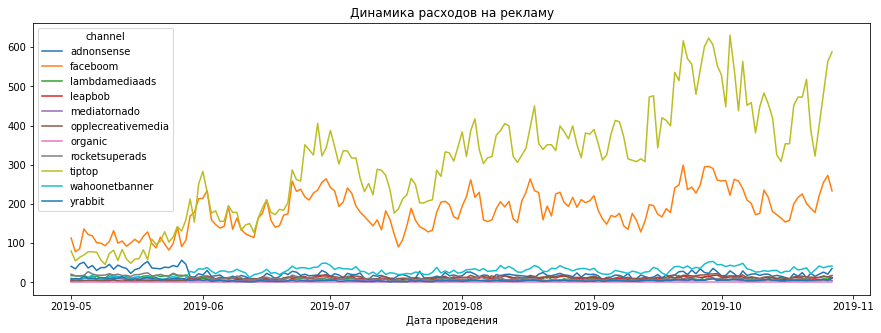

In [45]:
profiles.pivot_table(index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')\
        .plot(figsize = (15, 5))
plt.title('Динамика расходов на рекламу')
plt.xlabel('Дата проведения');

In [27]:
costs_total = pd.DataFrame()
costs_total['total'] = costs.groupby('channel')['costs'].sum()
costs_total['share'] = costs_total['total'] / costs['costs'].sum() * 100
costs_total.sort_values(by= 'share', ascending = False).style.format({'total':'{:.2f}','share':'{:.2f}%'})

,total,share
channel,,
tiptop,54751.30,51.90%
faceboom,32445.60,30.75%
wahoonetbanner,5151.00,4.88%
adnonsense,3911.25,3.71%
opplecreativemedia,2151.25,2.04%
rocketsuperads,1833.00,1.74%
leapbob,1797.60,1.70%
lambdamediaads,1557.60,1.48%
mediatornado,954.48,0.90%


Самыми дорогими каналами привлечения являются tiptop и faceboom. Так, на их долю приходится более 80% всего фонда оплаты маркетинга. По данным каналам наблюдается положительный тренд по размеру затраченных на маркетинг ср-в.

Также стоит отметить, что другие каналы, приносящие платящих пользователей, обходятся в разы дешевле: adnonsense и lambdamediaads занимают лишь 3.71% и 1.48% общего размера трат на маркетинг.

Определим, сколько в среднем стоило привлечение одного покупателя из каждого источника.

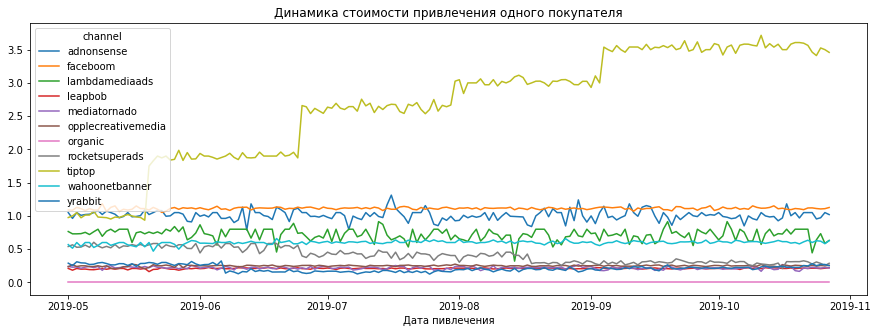

In [46]:
profiles.pivot_table(index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'mean')\
        .plot(figsize = (15, 5))
plt.title('Динамика стоимости привлечения одного покупателя')
plt.xlabel('Дата пивлечения');

In [29]:
costs_cac = pd.DataFrame()
costs_cac['cac'] = profiles.groupby('channel')['acquisition_cost'].mean()
costs_cac.sort_values(by= 'cac', ascending = False)

,cac
channel,
tiptop,2.799003
faceboom,1.113286
adnonsense,1.008054
lambdamediaads,0.724802
wahoonetbanner,0.602245
rocketsuperads,0.412095
opplecreativemedia,0.250000
yrabbit,0.218975
mediatornado,0.218717


Из графика и таблицы видно, что самый дорогой клиент приходит через tiptop: на привлечение каждого клиента приходится затратить 2.8 у.е. Однако, и по общему кол-ву привлеченных посетителей, и по величине платящих пользователей он не лидирует. Возникает вопрос о целесообразности и окупаемости рекламных кампаний. Оценим окупаемость рекламы для привлечения пользователей.

## Окупаемость рекламы для привлечения пользователей

Для корректной оценки окупаемости исключим органических пользователей, поскольку для их привлечения компания не потратила ни 1 у.е., соответственно анализировать их CAC и ROI не имеет смысла.

Предположим, что мы смотрим данные 1-го ноября 2019 года. В нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей. Установим момент и горизонт анализа.

In [30]:
profiles_ch = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI

### Общая окупаемость рекламы

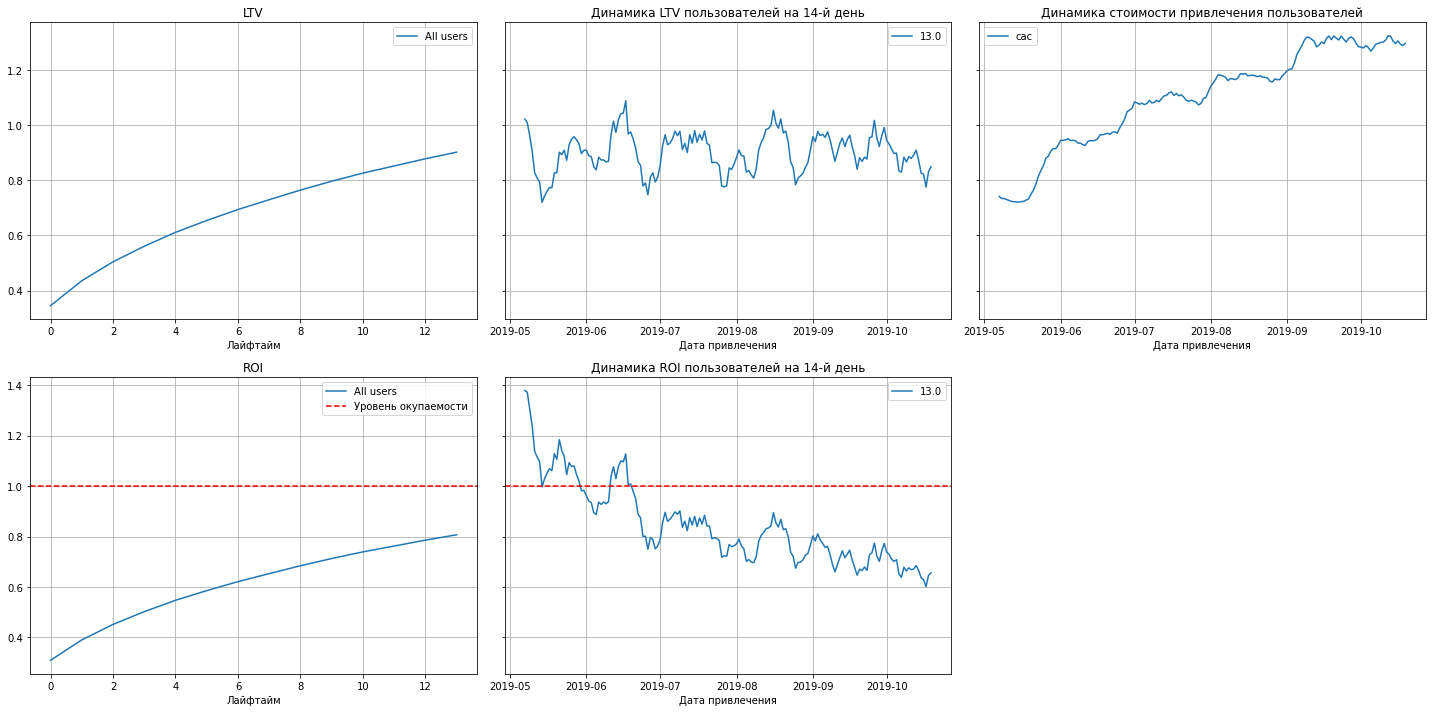

In [31]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=[]
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:

- Реклама не окупается. ROI в конце второй недели — чуть выше 80%.
- CAC имеет положительный тренд. **Заметны крупные скачки, причина которых в увеличении рекламного бюджета tiptop.**
- LTV нестабилен. Возможно, дело в ухудшении качества пользователей.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Окупаемость рекламы с разбивкой по устройствам

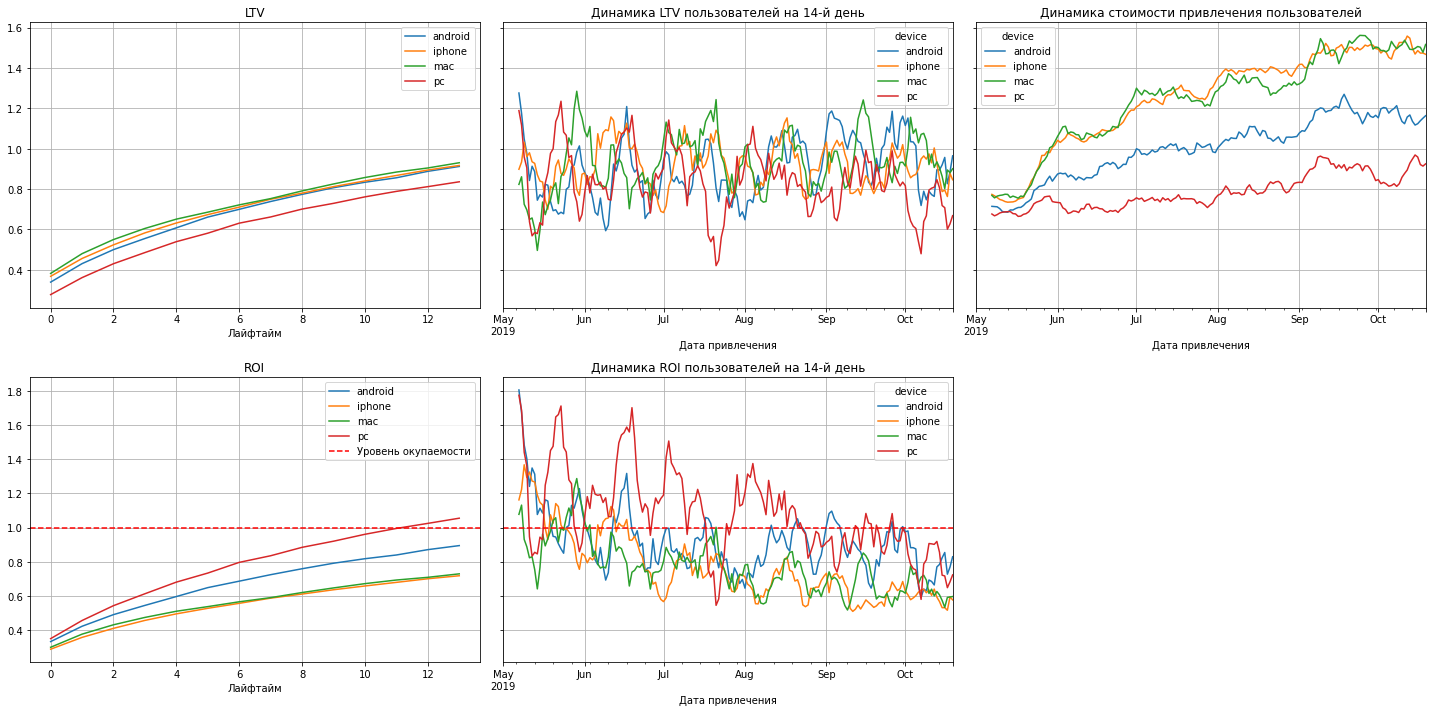

In [32]:
# смотрим окупаемость с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Промежуточные выводы:

- Стабильно окупаются лишь пользователи PC
- Минимальные показатели ROI зафиксированы у владельцев iPhone и MAC

Проверим, имеет ли значение страновой фактор.

### Окупаемость рекламы с разбивкой по странам

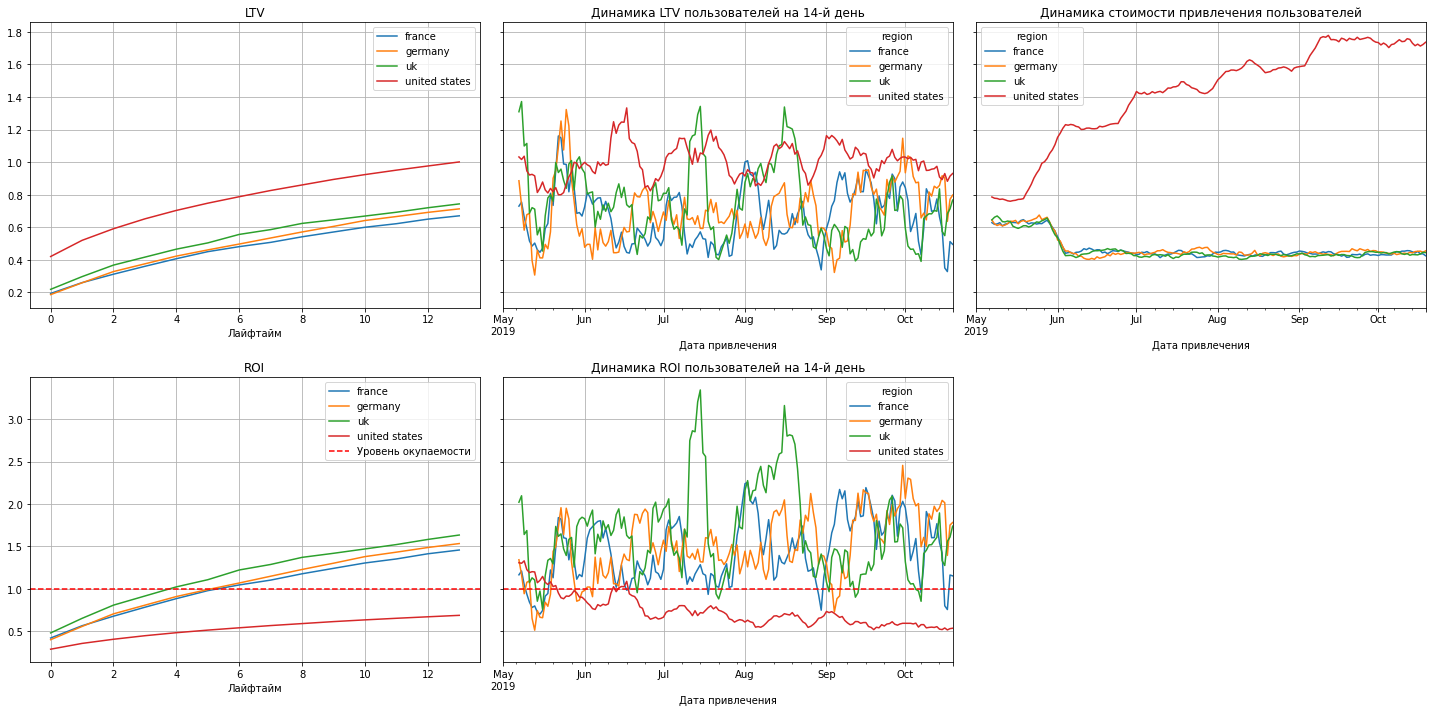

In [33]:
# смотрим окупаемость с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Промежуточные выводы:

- Страны Европы показывают стабильную окупаемость. Лидер - Великобритания.
- Явным аутсайдером является США: несмотря на внушительные размеры CAC, рекламные кампании убыточны.

Выяснили, что страновой фактор имеет значение, проверим обстановку с рекламными каналами.

### Окупаемость рекламы с разбивкой по рекламным каналам

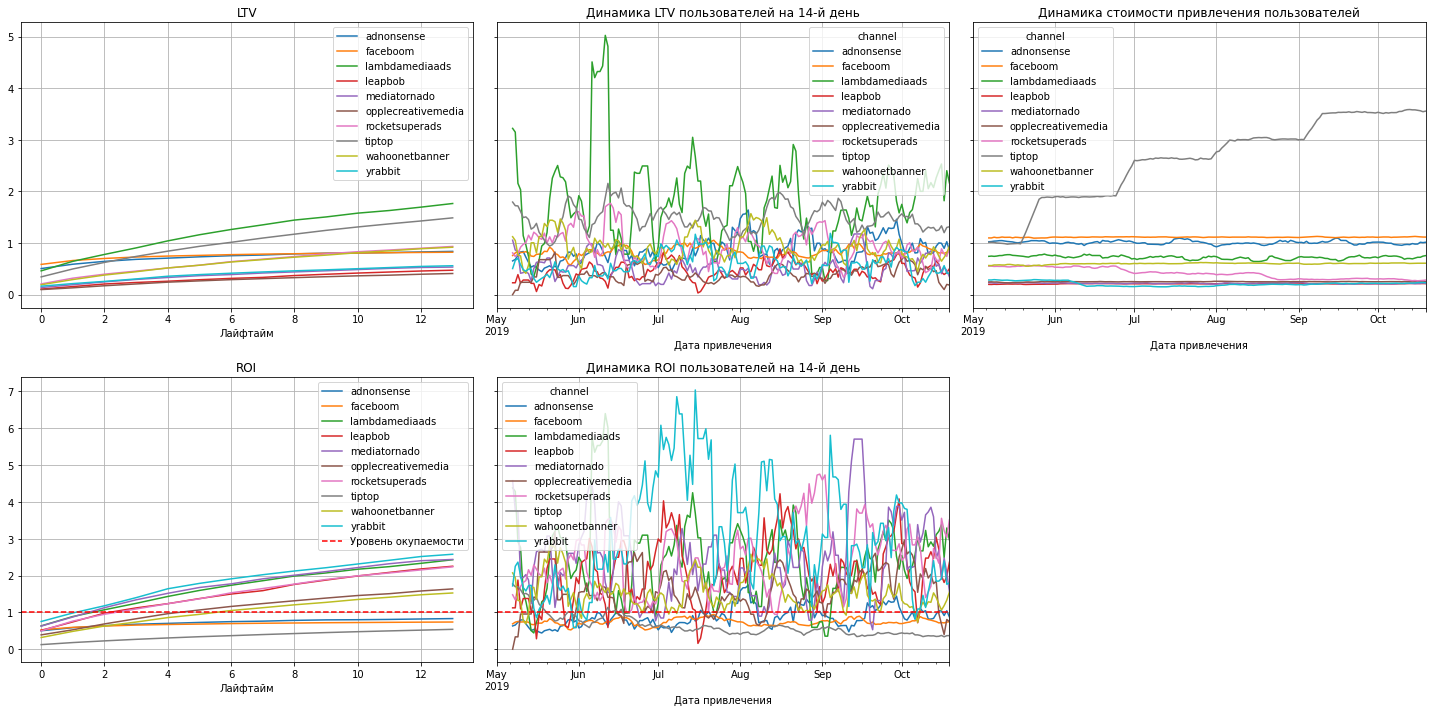

In [34]:
# смотрим окупаемость с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ch, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Промежуточные выводы:

- Самые убыточные каналы привлечения: tiptop, faceboom, adnonsense (однако они приводят хороший показатель платящих пользователей)
- Возможно стоит обратить внимание, например, на lambdamediaads: канал окупается и приводит хороший уровень платящих пользователей

Чтобы понять причины неокупаемости некоторых групп пользователей, рассчитаем конверсию и удержание.

### Конверсия и удержание с разбивкой по устройствам, странам, рекламным каналам

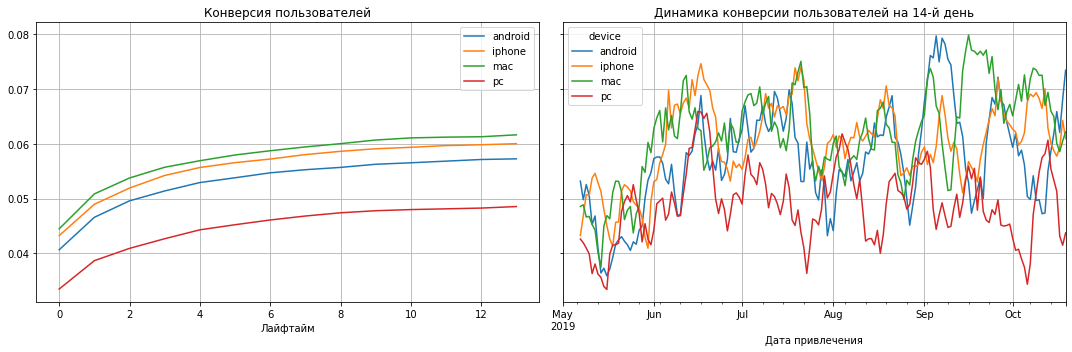

In [35]:
# смотрим конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи iPhone и MAC конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании.

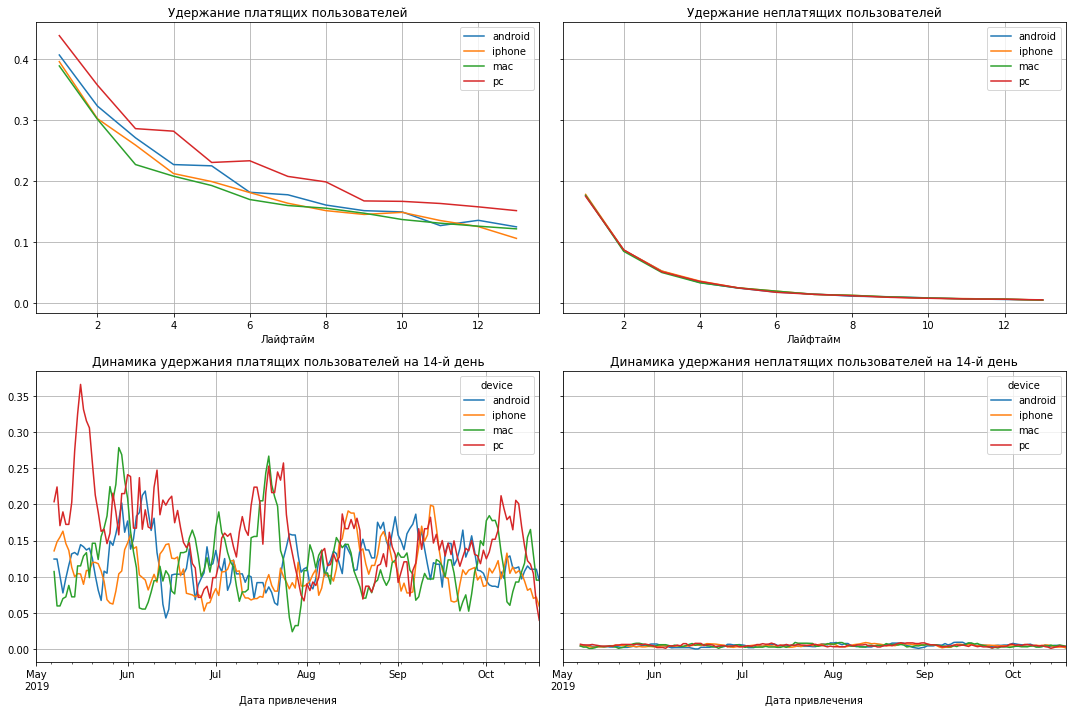

In [36]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions= ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи iPhone и MAC удерживаются хуже пользователей других устройств. Возможно есть какие-либо технические недоработки или баги для платформы iOS.

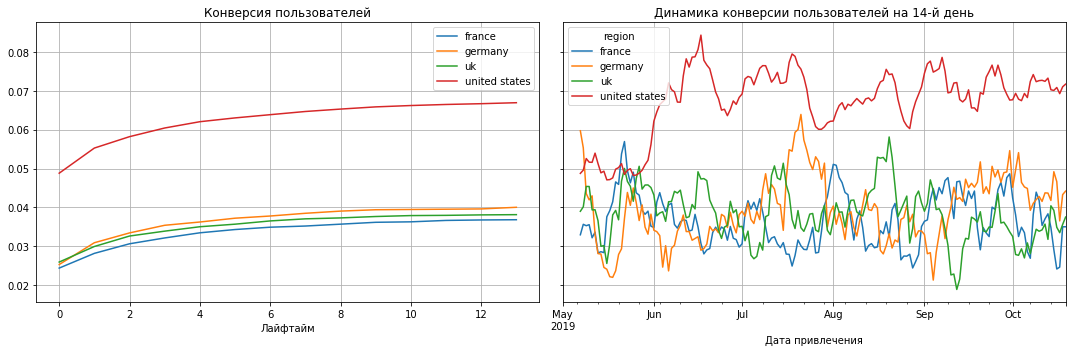

In [37]:
# смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

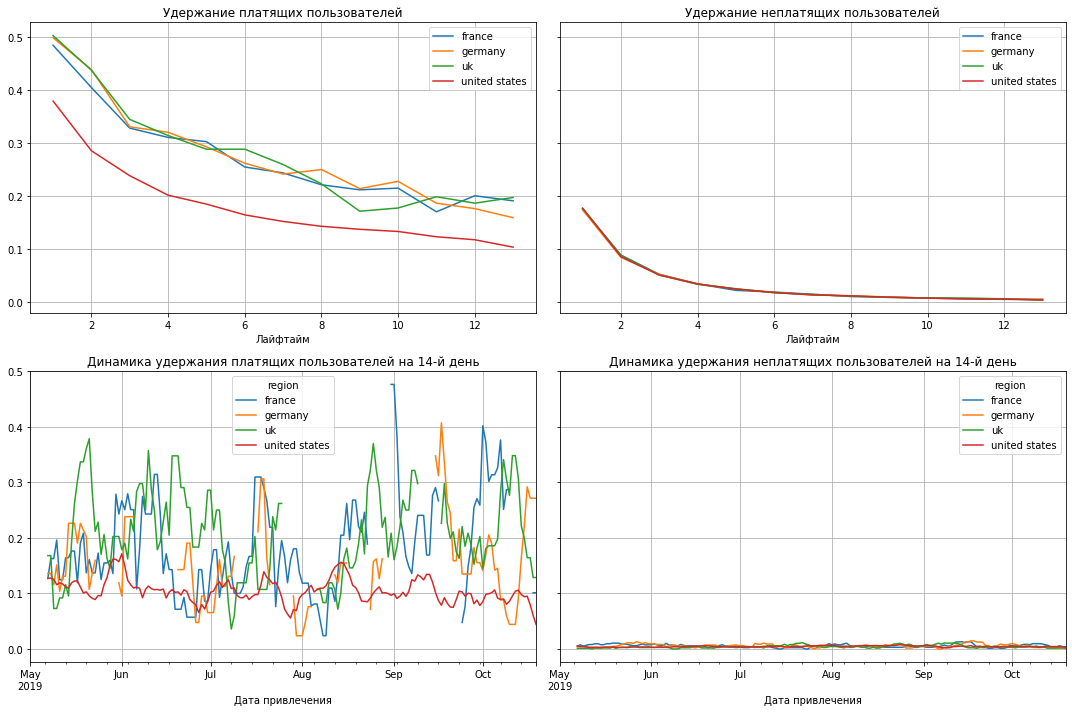

In [38]:
# смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions= ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на хороший уровень конверсии, пользователи из США удерживаются хуже всех. Стоит дополнительно проработать стратегию работы с пользователями данного региона.

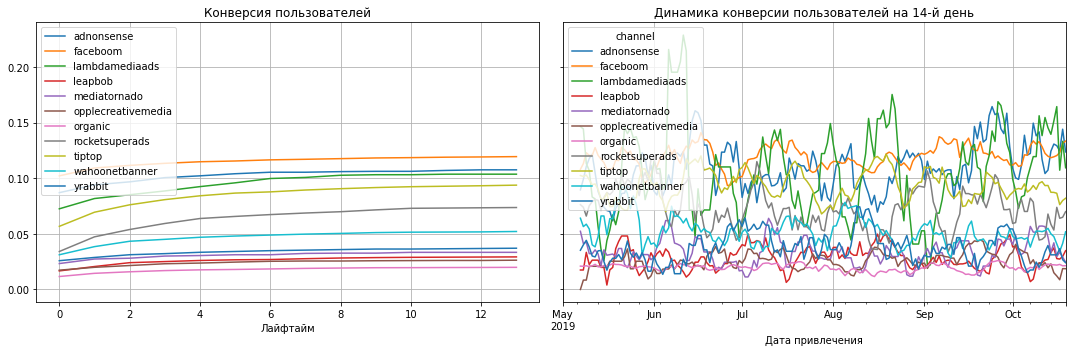

In [39]:
# смотрим конверсию с разбивкой по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

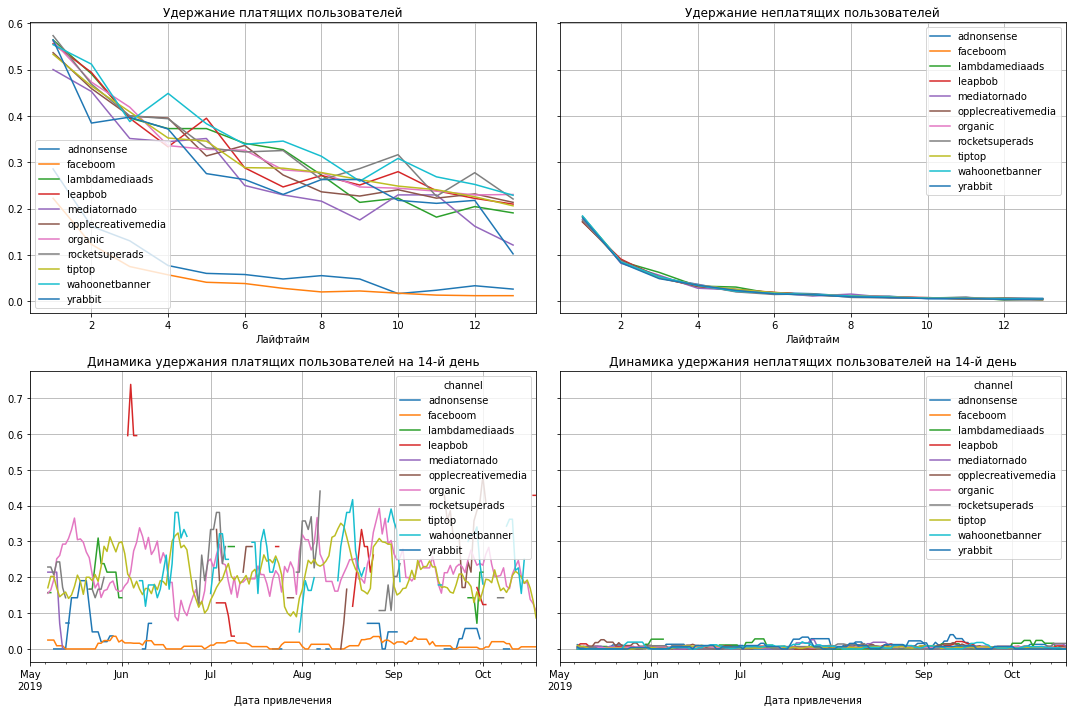

In [40]:
# смотрим удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions= ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

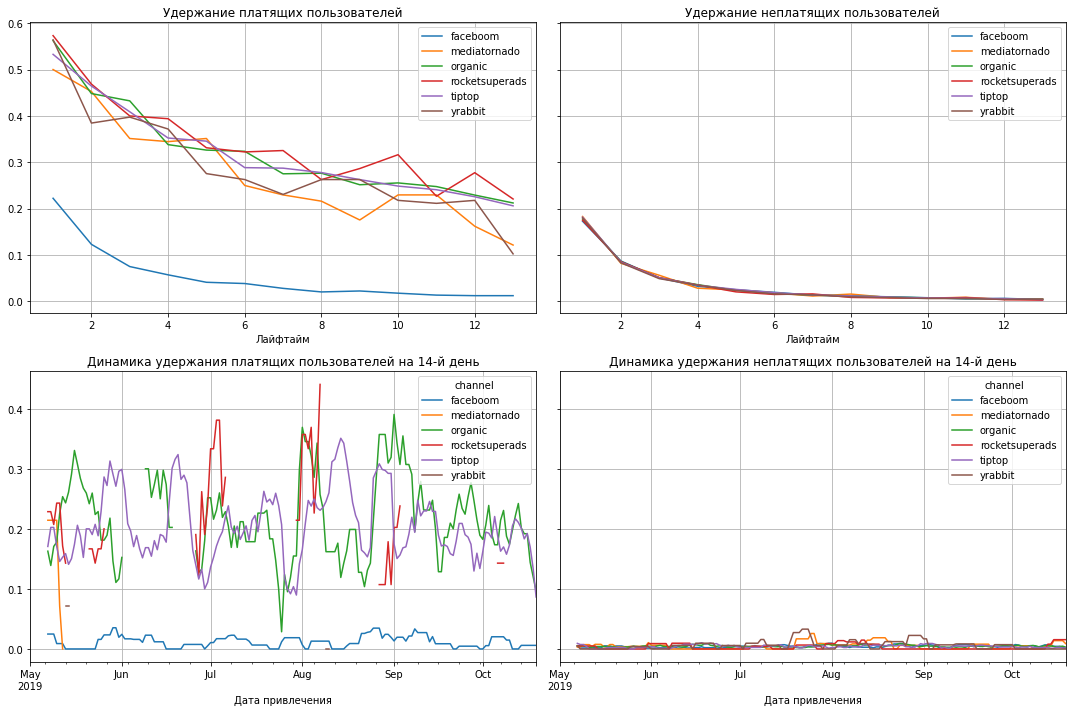

In [41]:
# смотрим удержание отдельно для США
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region == "united states"'), visits, observation_date, horizon_days, dimensions= ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

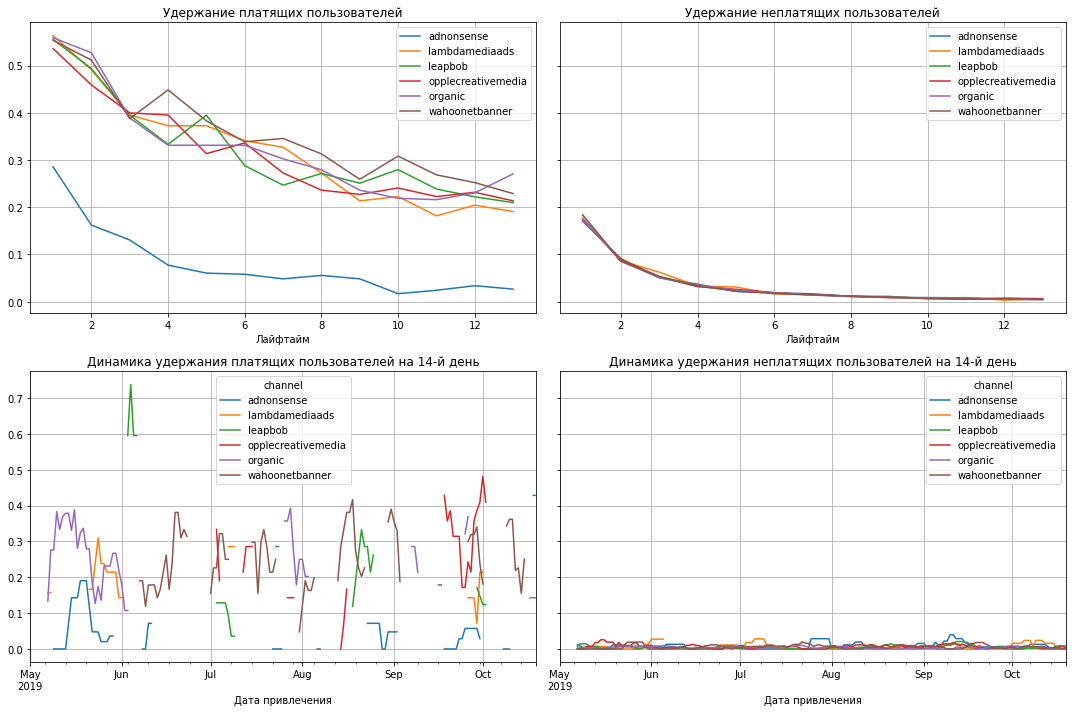

In [42]:
# смотрим удержание отдельно для стран Европы
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region != "united states"'), visits, observation_date, horizon_days, dimensions= ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно, каналы faceboom, adnonsense дают худшие показатели по удержанию пользователь, что негативно сказывается на окупаемости.

## Выводы

Таким образом, был проведен анализ и рассчет LTV, ROI, удержания и конверсии пользователей развлекательного приложения Procrastinate Pro+. 

В процессе анализа было обнаружено, что несмотря на постоянно растущие расходы на проведение маркетинговых кампаний, **окупаемость вложенных инвестиций не достигается** (ROI чуть выше 80%), что приводит к постоянным убыткам.

Негативное влияние на окупаемость рекламы могут оказывать:

- По типу используемых устройств: пользователи iPhone и MAC
- В страновом разрезе: пользователи из США
- По рекламным каналам: пользователи, пришедшие через tiptop, faceboom, adnonsense

В результате анализа были обнаружены возможные причины для убытков, которые сейчас несет компания:

- Пользователи iPhone и MAC конвертируются постоянно и очень хорошо, а удерживаются хуже пользователей других устройств. Возможно есть какие-либо технические недоработки или баги для платформы iOS.
- Несмотря на хороший уровень конверсии, пользователи из США удерживаются хуже всех. Возможно не учтен менталитет и национальные особенности при подборе развлекательного контента данным пользователям.
- faceboom и adnonsense приносят в основном одноразовых пользователей, о чем свидетельствует уровень удержания. Возможно стоит пересмотреть инвестиции в данные каналы привлечения пользователей.

Подводя итог, получаем что **основная причина - неэффективное привлечение пользователей.** 

**Рекомендации для отдела маркетинга:**

1) Провести техническое расследование и проверить работоспособность приложения на платформе IOS

2) Рекламные кампании должны быть клиентоориентированными и учитывать различия пользователей в зависимости от страны проведения: 

    - проработать подборку и выдачу развлекательного контента исходя из национальных особенностей (отдельно для Европы и 
    отдельно для США);
    - для привлечения пользователей из США отказаться от канала faceboom;
    - для привлечения пользователей из Европы отказаться от канала adnonsense
3) Рассмотреть альтернативные каналы привлечения пользователей: 

    - для пользователей из США - rocketsuperads, mediatornado;
    - для пользователей из Европы - lambdamediaads, leapbob